In [4]:
import json

no_hack = '/Users/vanek/PycharmProjects/DeepRL/src/models/DQN/logs/no_reward_hacking'
hack = '/Users/vanek/PycharmProjects/DeepRL/src/models/DQN/logs/reward-hacking'

In [5]:
import pandas as pd

In [6]:
import os
with open(os.path.join(no_hack, 'dqn_MountainCarContinuous-v0_metrics_averaged.json'), 'r') as f:
    no_hack_data = json.load(f)

In [7]:
with open(os.path.join(hack, 'dqn_MountainCarContinuous-v0_metrics_averaged.json'), 'r') as f:
    hack_data = json.load(f)

In [19]:
hack_data.keys()

dict_keys(['eval_rewards', 'eval_timesteps', 'losses', 'epsilons', 'final_eval_reward', 'total_episodes', 'total_timesteps', 'training_time_seconds', 'env', 'seeds', 'hyperparams'])

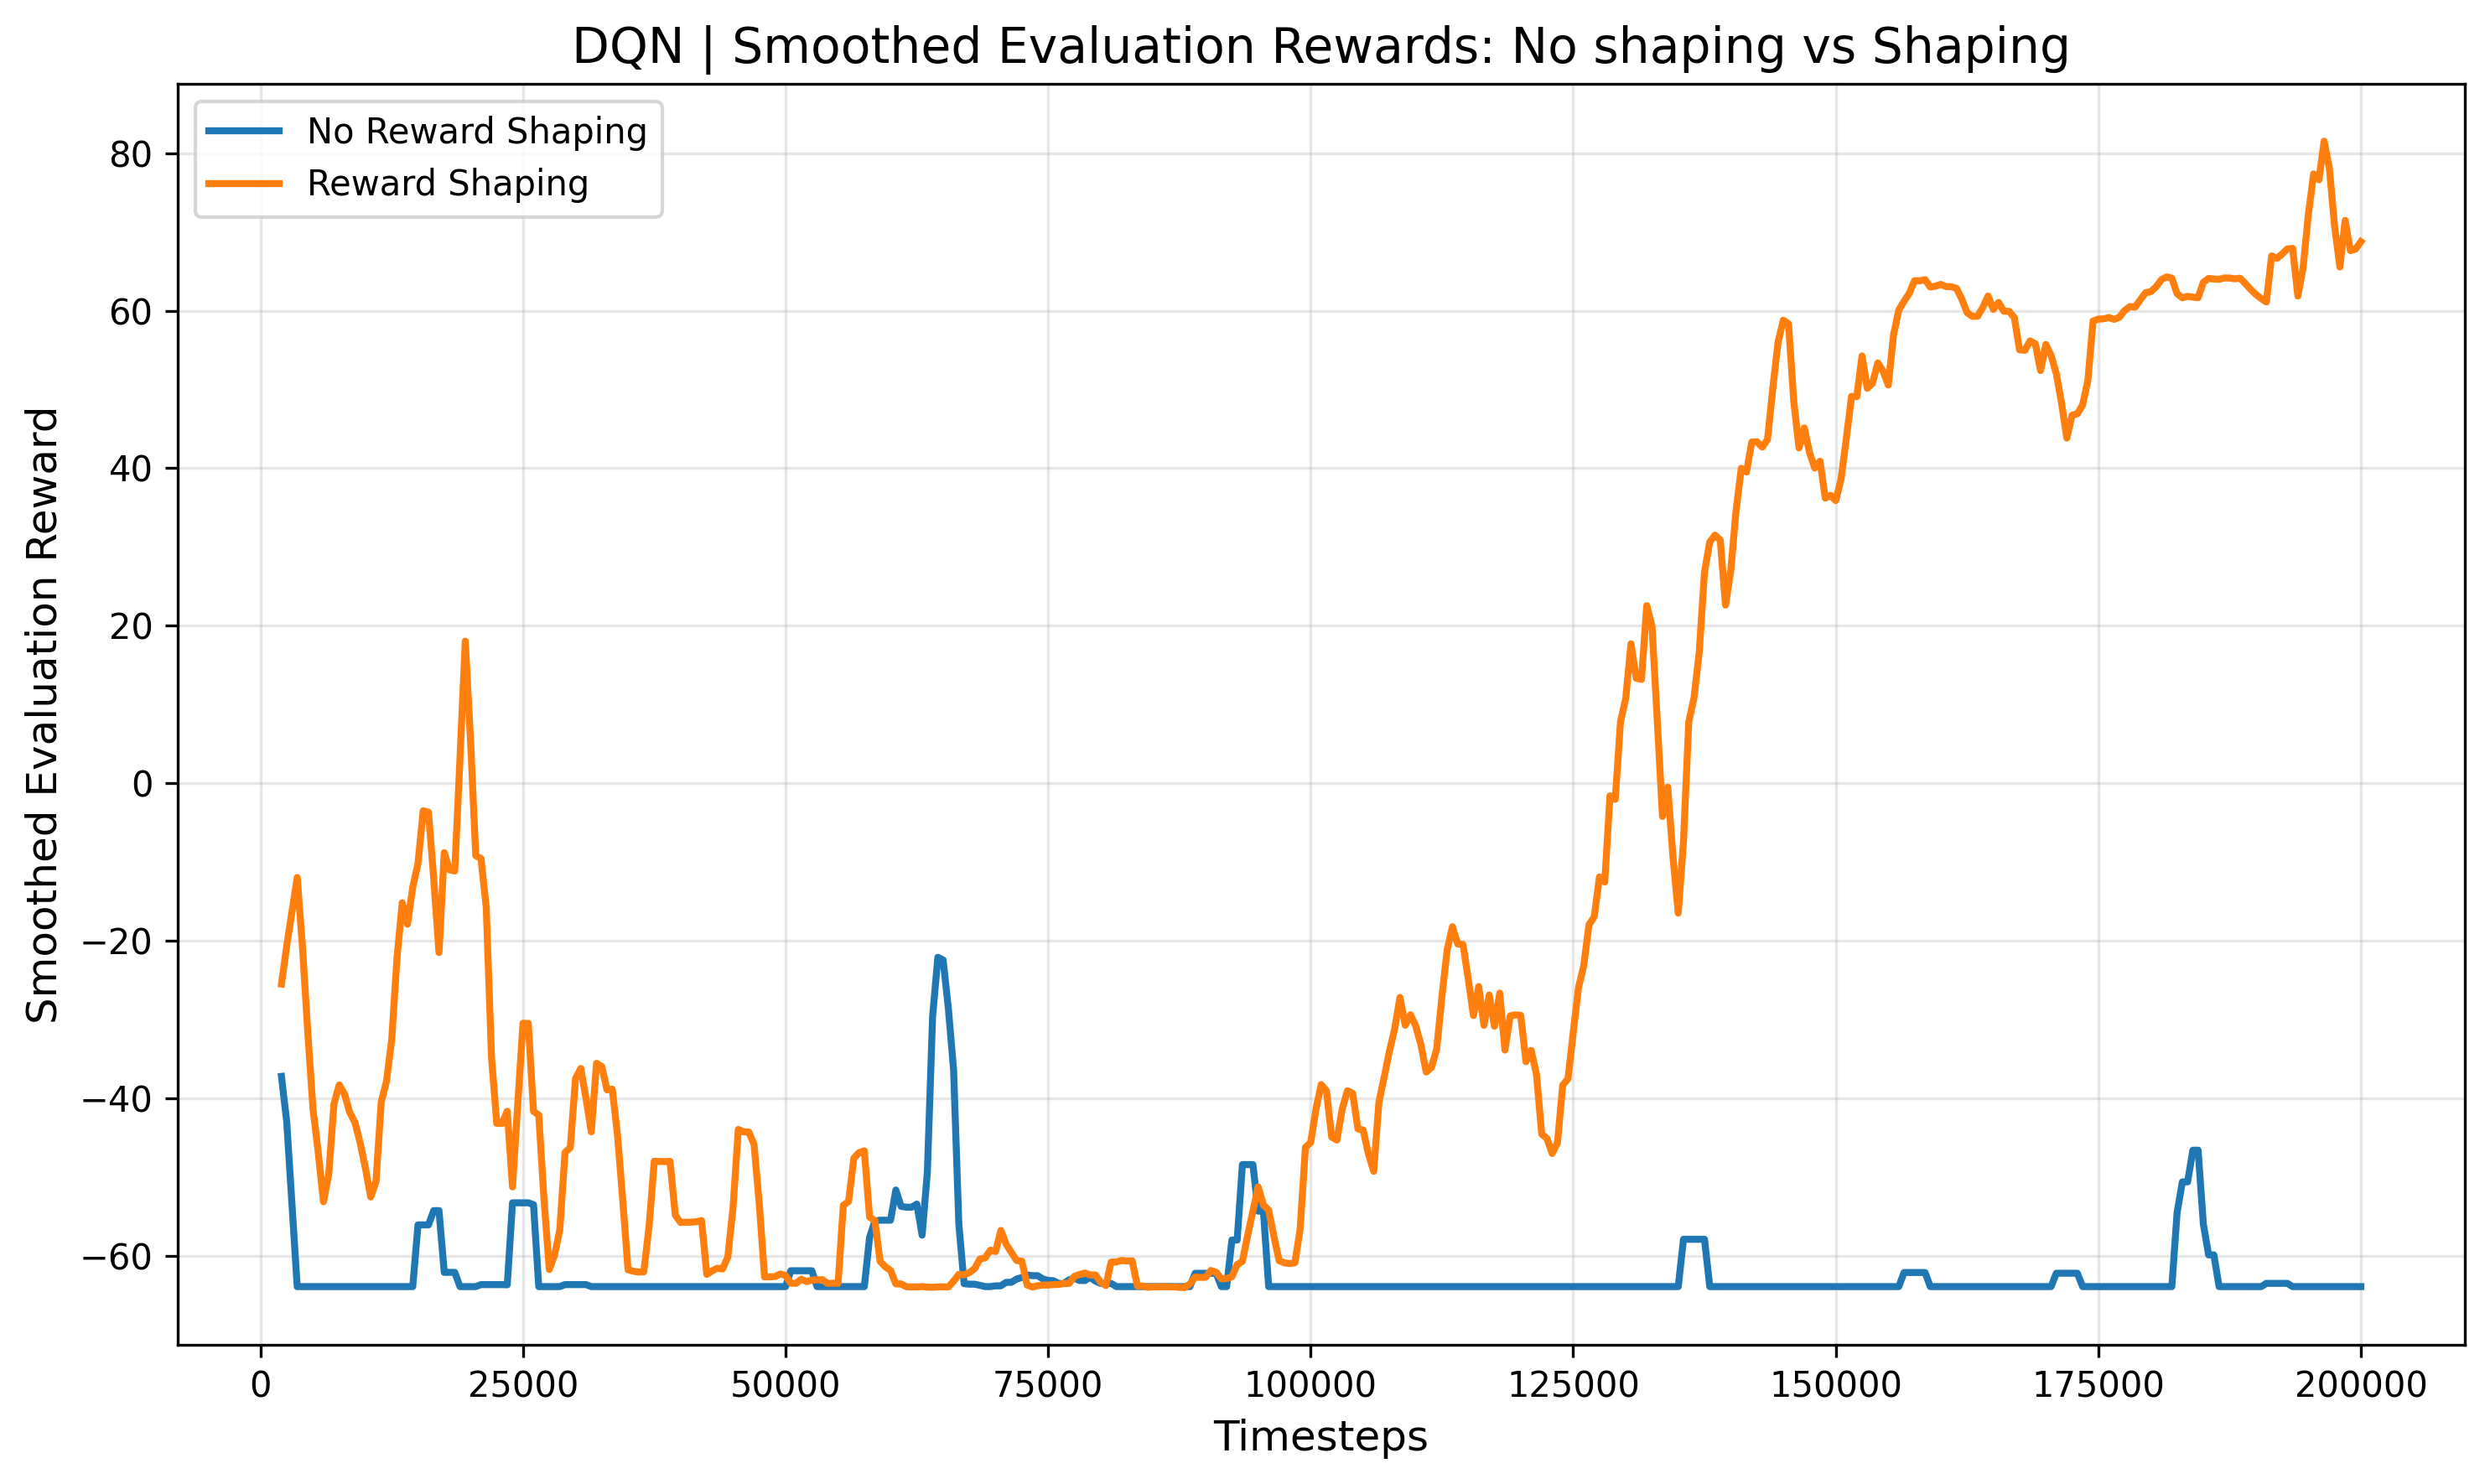

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def smooth(x, window_size):
    return np.convolve(x, np.ones(window_size) / window_size, mode='valid')


window = 5
smoothed_no_hack = smooth(no_hack_data['eval_rewards'], window)
smoothed_hack = smooth(hack_data['eval_rewards'], window)

plt.figure(figsize=(10, 6), dpi=300)
eval_timesteps = no_hack_data['eval_timesteps'][window - 1:]  # Adjust length to match smoothed data
plt.plot(eval_timesteps, smoothed_no_hack, label='No Reward Shaping', linewidth=2)
plt.plot(eval_timesteps, smoothed_hack, label='Reward Shaping', linewidth=2)
plt.xlabel('Timesteps', fontsize=12)
plt.ylabel('Smoothed Evaluation Reward', fontsize=12)
plt.title('DQN | Smoothed Evaluation Rewards: No shaping vs Shaping', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('evaluation_rewards.png', format='png', bbox_inches='tight', dpi=300)
plt.show()
